**Warning**: do not execute the whole notebook from start to end! Blocksci is not able to reload the chain object with new data, so the first chain loaded will be used for all plots...

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
import math
import pickle
#%matplotlib notebook
%matplotlib inline
labelsize=40
matplotlib.rc('xtick', labelsize=labelsize) 
matplotlib.rc('ytick', labelsize=labelsize)

In [2]:
# Import blocksci
import blocksci

In [3]:
def df_resample_mean(df, granul=10):
    grouped_df = df.groupby(np.arange(len(df))//granul).mean()
    return grouped_df

In [4]:
def plot_fee_per_byte(fee_per_byte, resample=False, fig_name="avg_fee_rate.pdf", ylim=3500):
    if resample:
        df_fees = pd.DataFrame(fee_per_byte, columns=["Height", "Avg. fee paid (satoshis per byte)"])
        df_fees_r = df_resample_mean(df_fees, resample)
        df_fees_r.index = df_fees_r["Height"]
        del df_fees_r["Height"]

        plt.figure(figsize=(20,10))
        plt.plot(df_fees_r.index, df_fees_r["Avg. fee paid (satoshis per byte)"])
        #plt.title("Average fee rate paid", {'color': 'k', 'fontsize': 34})
        plt.xlabel("Height", {'color': 'k', 'fontsize': 40})
        plt.ylabel("Avg. fee paid (litoshis per byte)", {'color': 'k', 'fontsize': 40})
        plt.ylim((0,ylim))
        plt.tight_layout()
        plt.savefig(fig_name, bbox_inches='tight')

    else:
        df_fees = pd.DataFrame(fee_per_byte, columns=["Height", "Avg. fee paid (satoshis per byte)"])
        df_fees.index = df_fees["Height"]
        del df_fees["Height"]

        plt.figure(figsize=(20,10))
        plt.scatter(df_fees.index, df_fees["Avg. fee paid (satoshis per byte)"], s=0.05, alpha=0.75)
        #plt.title("Average fee rate paid", {'color': 'k', 'fontsize': 24})
        plt.xlabel("Height", {'color': 'k', 'fontsize': 40})
        plt.ylabel("Avg. fee paid (litoshis per byte)", {'color': 'k', 'fontsize': 40})
        plt.ylim((0,ylim))
        plt.tight_layout()
        plt.savefig(fig_name, bbox_inches='tight')

# 1. Bitcoin Fee-per-byte rate

In [5]:
# Create a Blockhain object
parser_data_directory = "/home/bitcoin/BlockSci/parsed-data-bitcoin"
chain_btc = blocksci.Blockchain(parser_data_directory)

In [6]:
fee_per_byte_btc = [(block.height, np.mean(block.txes.fee_per_byte)) for block in chain_btc]

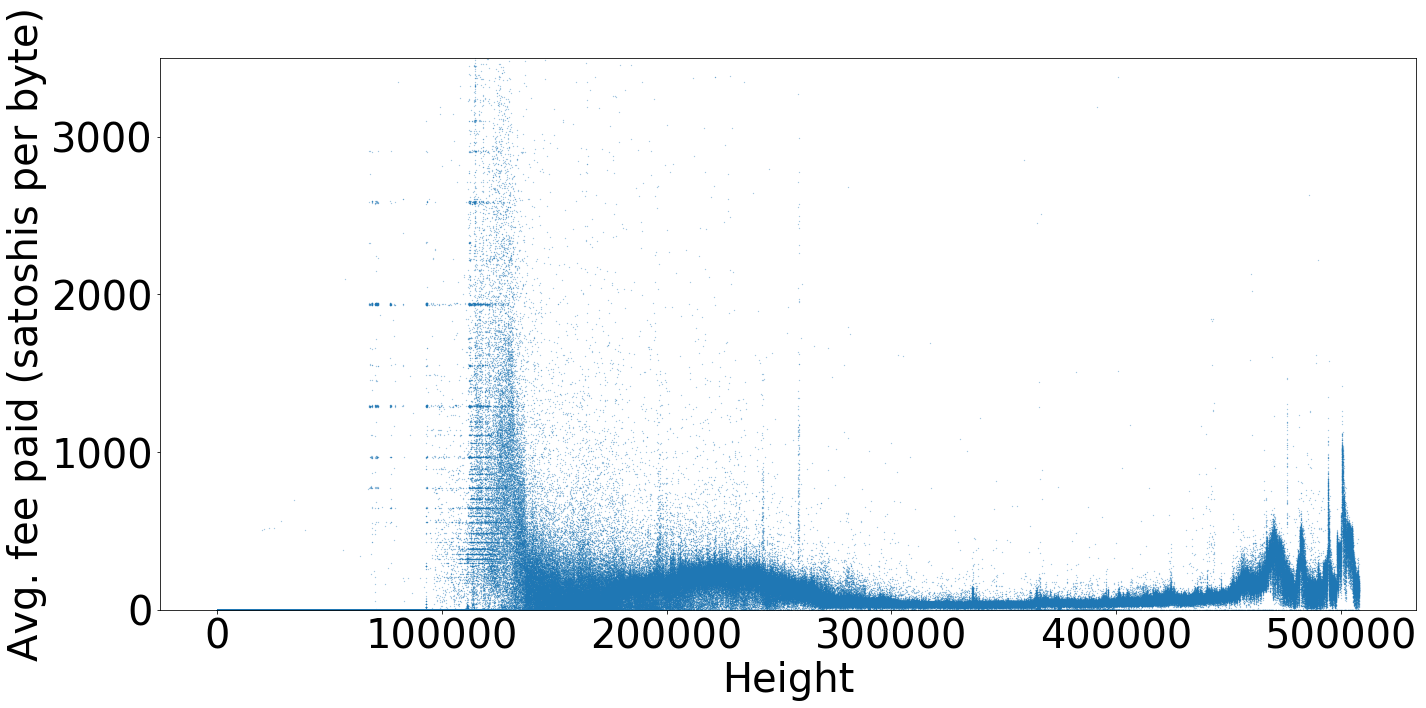

In [8]:
plot_fee_per_byte(fee_per_byte_btc, fig_name="avg_fee_rate_btc.pdf")

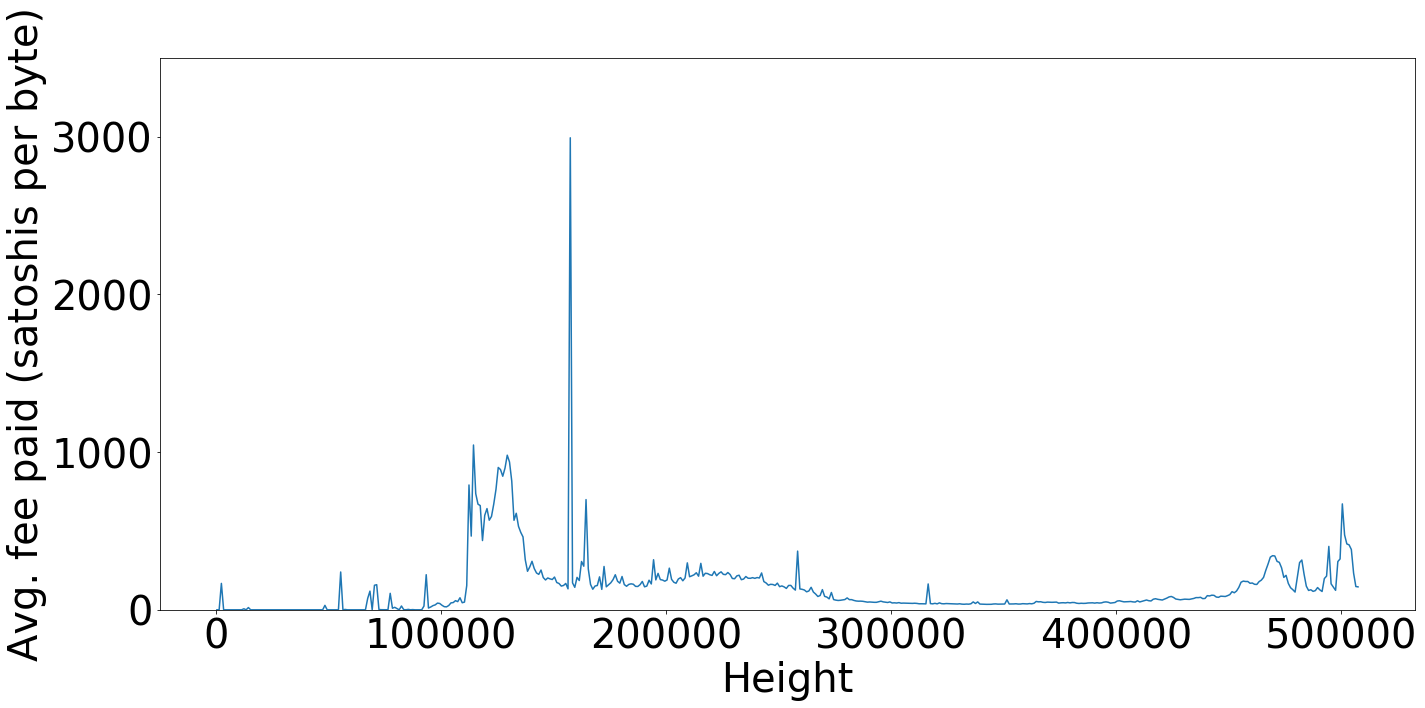

In [9]:
plot_fee_per_byte(fee_per_byte_btc, resample=1000, fig_name="avg_fee_rate_btc.pdf")

# 2. Bitcoin Cash Fee-per-byte rate

In [5]:
# Create a Blockhain object
parser_data_directory = "/home/bitcoin/BlockSci/parsed-data-bitcoincash"
chain_bch = blocksci.Blockchain(parser_data_directory)

In [6]:
fee_per_byte_bch = [(block.height, np.mean(block.txes.fee_per_byte)) for block in chain_bch]

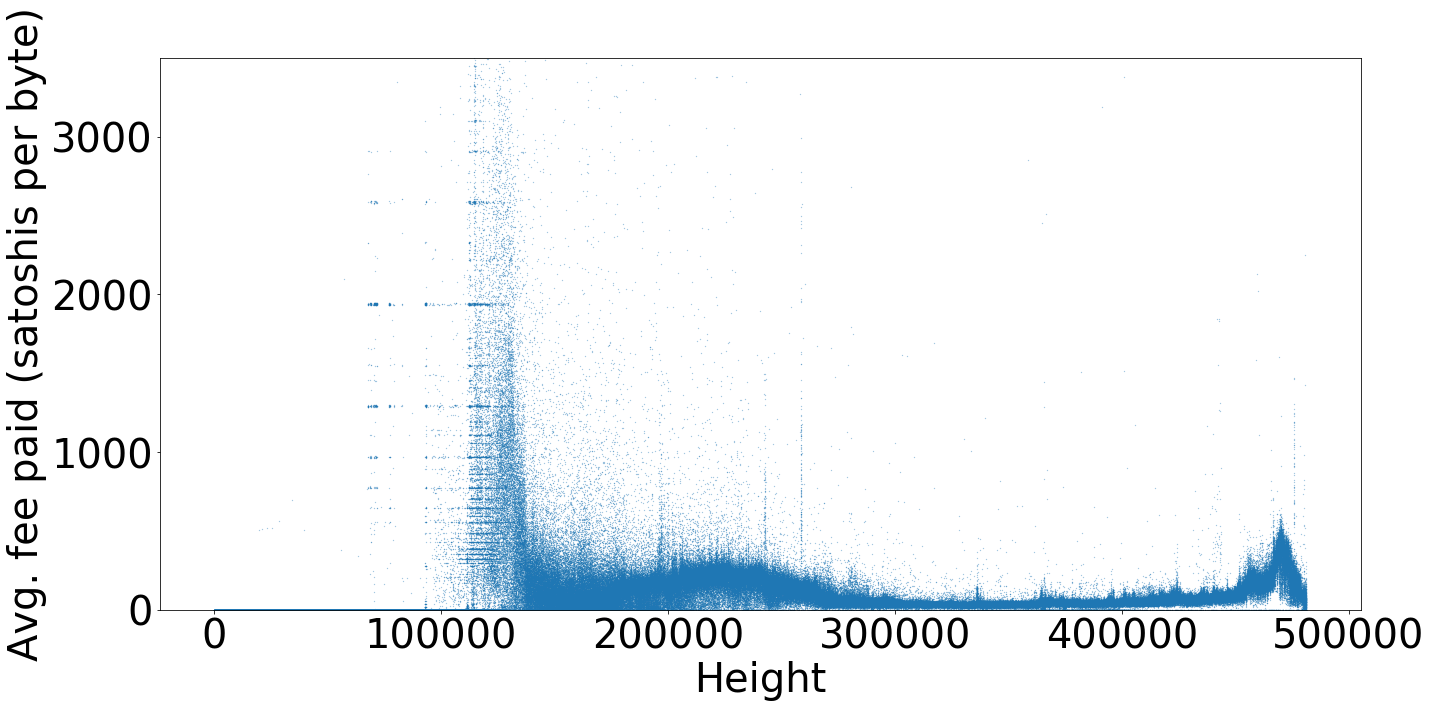

In [7]:
plot_fee_per_byte(fee_per_byte_bch, fig_name="avg_fee_rate_bch.pdf")

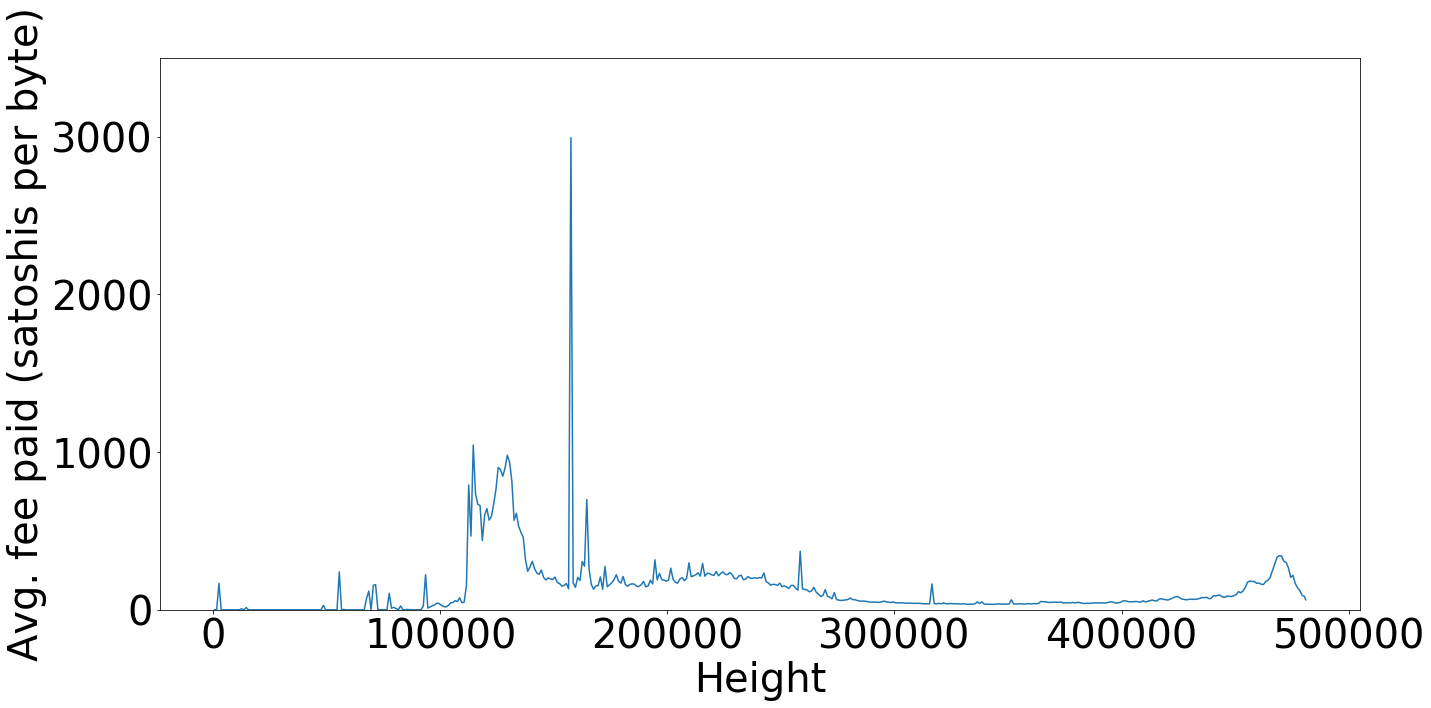

In [8]:
plot_fee_per_byte(fee_per_byte_bch, resample=1000, fig_name="avg_fee_rate_bch.pdf")

# 3. Litecoin Fee-per-byte rate

In [5]:
# Create a Blockhain object
parser_data_directory = "/home/bitcoin/BlockSci/parsed-data-litecoin"
chain_ltc = blocksci.Blockchain(parser_data_directory)

In [6]:
fee_per_byte_ltc = [(block.height, np.mean(block.txes.fee_per_byte)) for block in chain_ltc]

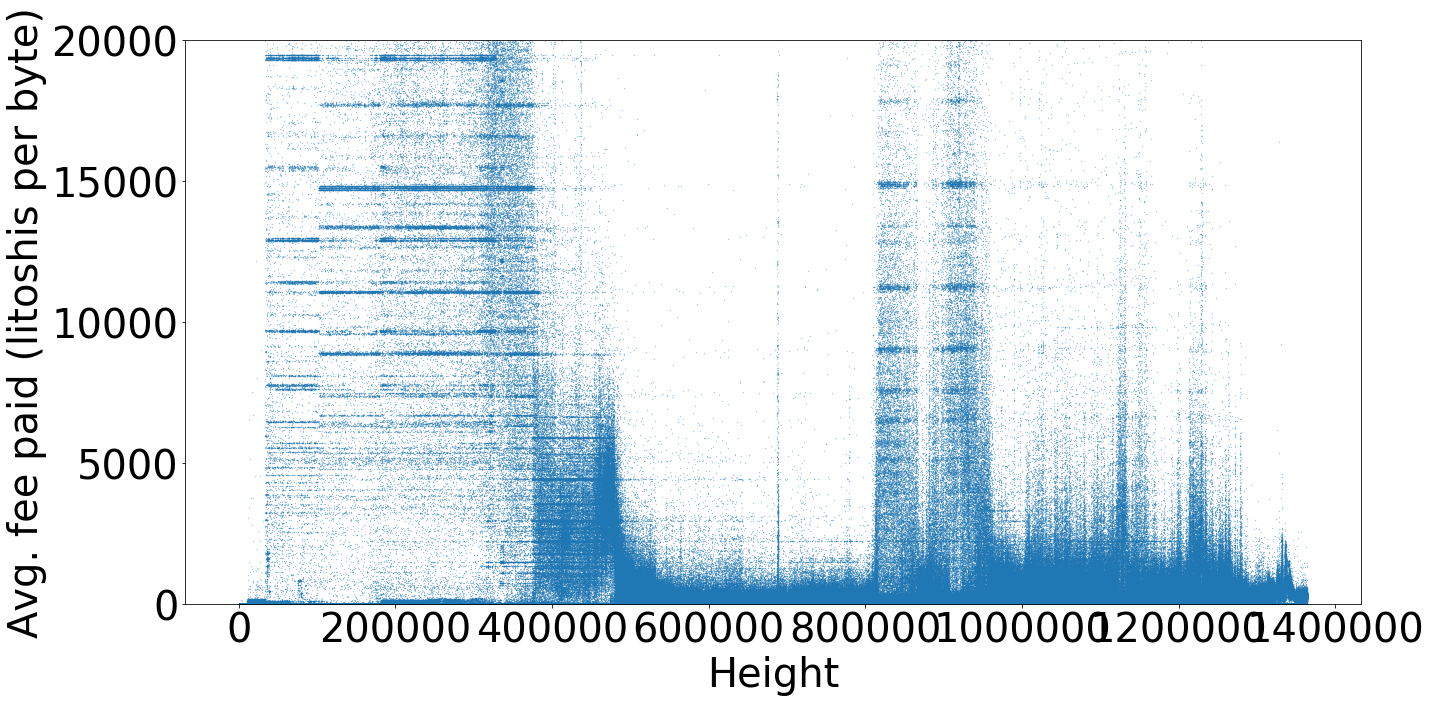

In [7]:
plot_fee_per_byte(fee_per_byte_ltc, fig_name="avg_fee_rate_ltc.pdf", ylim=20000)

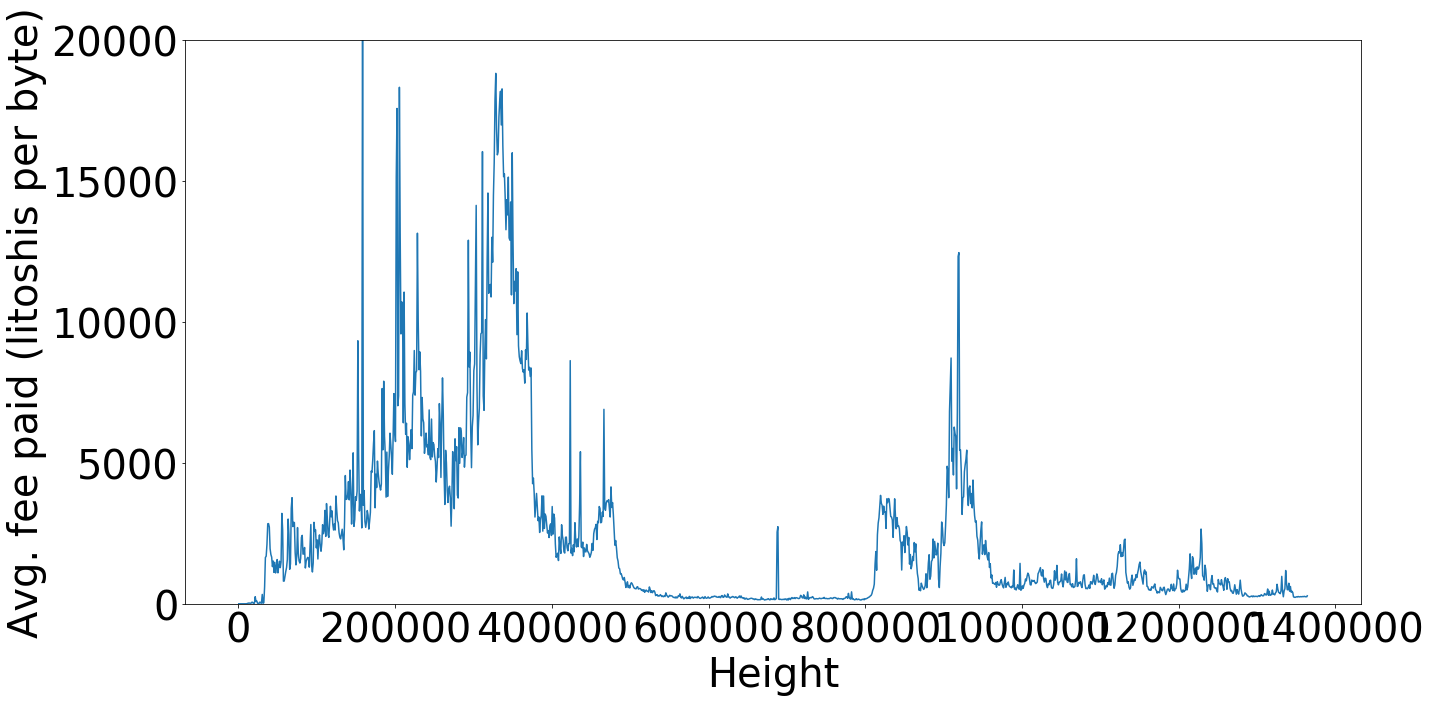

In [8]:
plot_fee_per_byte(fee_per_byte_ltc, resample=1000, fig_name="avg_fee_rate_ltc.pdf", ylim=20000)